In [4]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_exploded = df.explode('job_skills')

In [13]:
skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()

type(skills_count)

pandas.core.series.Series

In [19]:
df_skills_count = skills_count.reset_index(name='skills_count') 
# change from series to df because its better to work with 

df_skills_count = df_skills_count.sort_values(by='skills_count', ascending=False)

df_skills_count


,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


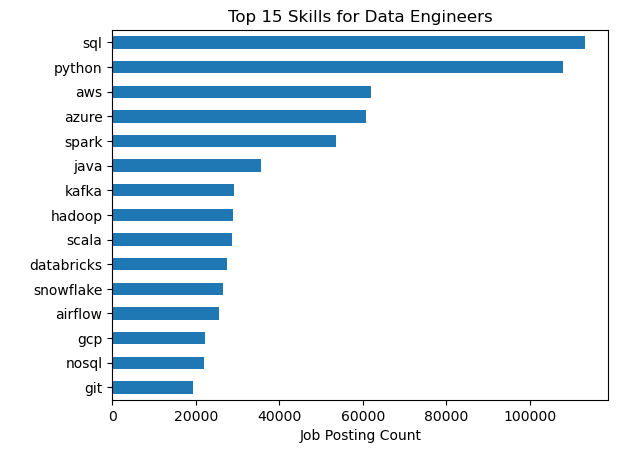

In [26]:
job_title = 'Data Engineer'
top_skills = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel(' ')
plt.legend().set_visible(False)
plt.show()